# W4995-AML Project team 32

This note book represents team project of group 32 for W4995-AML course

## Imports

In [23]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

## Data Loading and preprocessing (Jihua Li)

In [2]:
train_data = pd.read_csv('./data/train.csv')
test_data = pd.read_csv('./data/test.csv')
meal_info = pd.read_csv('./data/meal_info.csv')
center_info = pd.read_csv('./data/fulfilment_center_info.csv')

In [3]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders
0,1379560,1,55,1885,136.83,152.29,0,0,177
1,1466964,1,55,1993,136.83,135.83,0,0,270
2,1346989,1,55,2539,134.86,135.86,0,0,189
3,1338232,1,55,2139,339.50,437.53,0,0,54
4,1448490,1,55,2631,243.50,242.50,0,0,40


In [4]:
meal_info.head()

,meal_id,category,cuisine
0,1885,Beverages,Thai
1,1993,Beverages,Thai
2,2539,Beverages,Thai
3,1248,Beverages,Indian
4,2631,Beverages,Indian


In [5]:
center_info.head()

,center_id,city_code,region_code,center_type,op_area
0,11,679,56,TYPE_A,3.7
1,13,590,56,TYPE_B,6.7
2,124,590,56,TYPE_C,4.0
3,66,648,34,TYPE_A,4.1
4,94,632,34,TYPE_C,3.6


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 456548 entries, 0 to 456547
Data columns (total 9 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   id                     456548 non-null  int64  
 1   week                   456548 non-null  int64  
 2   center_id              456548 non-null  int64  
 3   meal_id                456548 non-null  int64  
 4   checkout_price         456548 non-null  float64
 5   base_price             456548 non-null  float64
 6   emailer_for_promotion  456548 non-null  int64  
 7   homepage_featured      456548 non-null  int64  
 8   num_orders             456548 non-null  int64  
dtypes: float64(2), int64(7)
memory usage: 31.3 MB


In [7]:
meal_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   meal_id   51 non-null     int64 
 1   category  51 non-null     object
 2   cuisine   51 non-null     object
dtypes: int64(1), object(2)
memory usage: 1.3+ KB


In [8]:
center_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   center_id    77 non-null     int64  
 1   city_code    77 non-null     int64  
 2   region_code  77 non-null     int64  
 3   center_type  77 non-null     object 
 4   op_area      77 non-null     float64
dtypes: float64(1), int64(3), object(1)
memory usage: 3.1+ KB


**Exciting, there is no obvious missing data**

In [9]:
train_data = pd.merge(train_data,meal_info,on='meal_id',how='left')
train_data = pd.merge(train_data,center_info, on='center_id', how='left')

In [10]:
train_data.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,category,cuisine,city_code,region_code,center_type,op_area
0,1379560,1,55,1885,136.83,152.29,0,0,177,Beverages,Thai,647,56,TYPE_C,2.0
1,1466964,1,55,1993,136.83,135.83,0,0,270,Beverages,Thai,647,56,TYPE_C,2.0
2,1346989,1,55,2539,134.86,135.86,0,0,189,Beverages,Thai,647,56,TYPE_C,2.0
3,1338232,1,55,2139,339.50,437.53,0,0,54,Beverages,Indian,647,56,TYPE_C,2.0
4,1448490,1,55,2631,243.50,242.50,0,0,40,Beverages,Indian,647,56,TYPE_C,2.0


## Feature analysis

### Category, Cuisine and City Code (Chenxi Jiang)

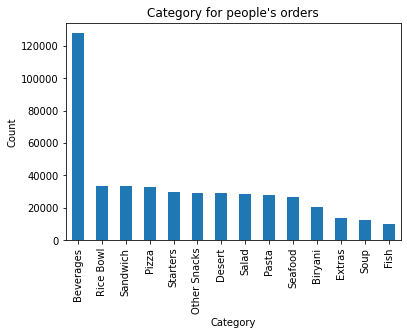

In [11]:
train_data['category'].value_counts().plot(kind='bar')
plt.title("Category for people's orders")
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

It's obvious that the Beverage is the most popular product for people and fish is the least. Also, they think 
rice bowl, sandwich, and pizza which are main courses have the same value through their life. Hence, we can provide
more beverages and less fish.

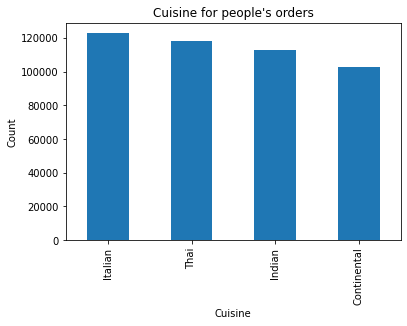

In [12]:
train_data['cuisine'].value_counts().plot(kind='bar')
plt.title("Cuisine for people's orders")
plt.xlabel('Cuisine')
plt.ylabel('Count')
plt.show()

We can observe that Italian is the most popular style for people to accept, then thai food is the second popular and Continental is the least. However, the intensity of the popular for those cuisine styles are not so much different from each other, which we can conclude the cuisine is globaly accpected for people.

In [14]:
city_vs_orders = train_data.groupby(by=['city_code']).sum().sort_values(by="num_orders", ascending=False)

In [16]:
city_vs_orders.head()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,region_code,op_area
city_code,,,,,,,,,,,
590,68500380033,4096327,4009581,109676519,1.809698e+07,1.932221e+07,3863,5462,19849062,3065776,243376.6
526,54460969019,3234304,3569828,88571571,1.454972e+07,1.543552e+07,3928,4126,9207953,1479850,164640.4
638,25075737939,1501585,1264329,40143244,6.610136e+06,7.074404e+06,1366,2518,6662450,1122632,120947.8
604,16311572669,973022,711660,26137348,4.279638e+06,4.606252e+06,904,1476,3533367,731472,55950.6
522,16860730917,1005792,1029436,27049640,4.454606e+06,4.759807e+06,910,1363,3375905,753704,53157.2


In [15]:
city_vs_orders.tail()

,id,week,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,region_code,op_area
city_code,,,,,,,,,,,
658,6981698535,418663,900151,11449377,1882743.50,2006411.62,542,612,813948,190094,21804.9
541,5616570486,334282,256557,9156923,1463309.87,1566797.27,481,379,768013,346577,12602.8
693,5774136160,345139,643153,9339460,1465443.75,1567617.08,489,484,743148,157318,12955.6
702,6589564742,390419,389536,10882981,1758719.84,1868701.41,518,438,691044,184240,14739.2
478,6278827384,372444,748129,10349169,1625222.55,1741617.52,498,437,637527,386617,12050.4


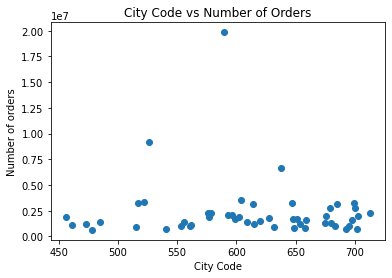

In [18]:
plt.scatter(city_vs_orders.index, city_vs_orders.num_orders)
plt.xlabel('City Code')
plt.ylabel('Number of orders')
plt.title('City Code vs Number of Orders')
plt.show()

We can infer from the result that 3 of the cities has the most orders while the rest of the cities are pretty much on average

## Features: Checkout_price, base_price and region code (Zixiang Tang)

In [17]:
features = ['checkout_price','base_price','region_code']
target = train_data['num_orders']
print(f'missing values in checkout price: ', any(train_data['checkout_price'].isnull()))
print(f'missing values in base price: ', any(train_data['base_price'].isnull()))
print(f'missing values in region code: ', any(train_data['region_code'].isnull()))
print(f'missing values in number of orders: ', any(train_data['num_orders'].isnull()))

missing values in checkout price:  False
missing values in base price:  False
missing values in region code:  False
missing values in number of orders:  False


It seems there's no missing valuse in checkout price, base price and region code. Also no missing values in target. 

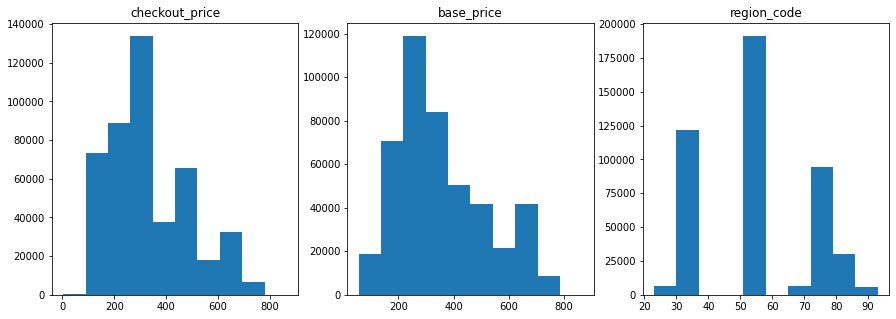

In [18]:
ind = 0
plt.figure(figsize=(15,5))
for i in features:
    ind+=1
    plt.subplot(1,3,ind)
    plt.hist(train_data[i])
    plt.title(i)

For check out and base price, the distributions are a bit skew to the right. For region code distribution, it looks like the data is gathered from several specific regions. 

In [19]:
print(train_data['region_code'].unique())

[56 85 77 34 35 71 93 23]


It's based on 8 regions.

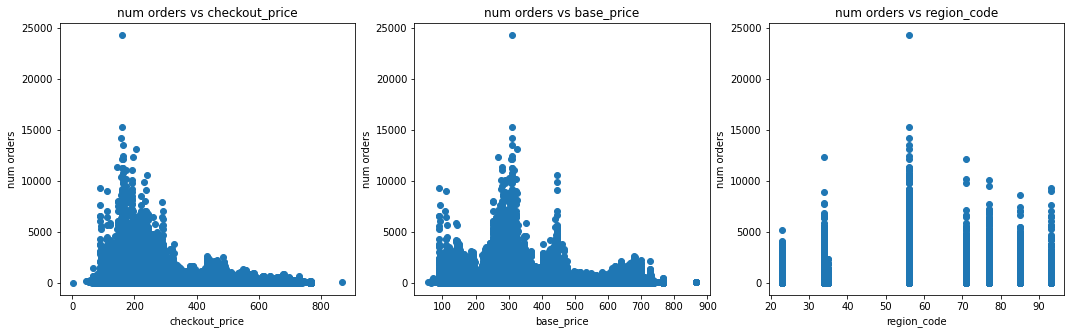

In [20]:
ind = 0
plt.figure(figsize=(18,5))
for i in features:
    ind+=1
    plt.subplot(1,3,ind)
    plt.scatter(train_data[i],target)
    plt.title(f'num orders vs '+i)
    plt.xlabel(i)
    plt.ylabel('num orders')

It doesn't look like there's relationship between check out price, base price, region code and our target. However, at some specific values of the three features, number of orders are higher than others.

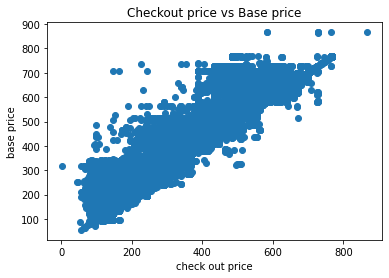

In [19]:
plt.scatter(train_data['checkout_price'],train_data['base_price'])
plt.xlabel('check out price')
plt.ylabel('base price')
plt.title('Checkout price vs Base price')
plt.show()

There's a linear relationship between check out price and base price (since they are related). 

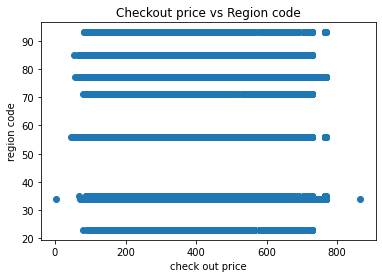

In [22]:
plt.scatter(train_data['checkout_price'],train_data['region_code'])
plt.xlabel('check out price')
plt.ylabel('region code')
plt.title('Checkout price vs Region code')
plt.show()

There's no relationship between check out price and region code, same for base price and region code.

## homepage_featured, emailer_for_promotion (Nicolo)

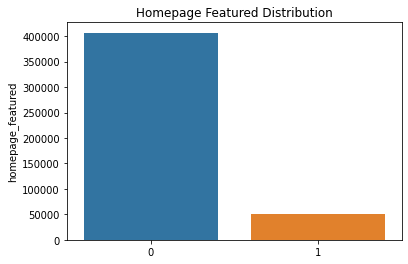

In [24]:
fig,ax = plt.subplots(1,1,figsize=(6,4));
sns.barplot(train_data['homepage_featured'].value_counts().index,train_data['homepage_featured'].value_counts());
    
ax.set_title("Homepage Featured Distribution");

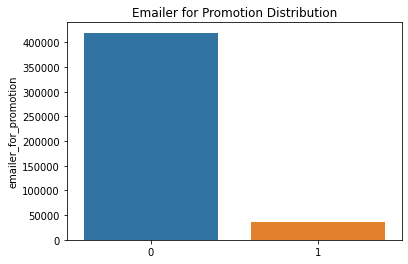

In [25]:
fig,ax = plt.subplots(1,1,figsize=(6,4));
sns.barplot(train_data['emailer_for_promotion'].value_counts().index,train_data['emailer_for_promotion'].value_counts());

ax.set_title("Emailer for Promotion Distribution");

In [25]:
train_data['emailer_for_promotion'].value_counts()

0    419498
1     37050
Name: emailer_for_promotion, dtype: int64

In [26]:
week_train = train_data.groupby(by='week').mean()
week_train.head()

,id,center_id,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
week,,,,,,,,,,,
1,1.247659e+06,81.552019,1977.382957,330.530205,348.516537,0.122177,0.141684,271.136550,601.802190,56.670431,4.079877
2,1.248203e+06,81.420925,1980.309738,323.926944,347.299448,0.214434,0.177486,271.783149,601.921961,56.691298,4.085014
3,1.247274e+06,81.822008,1974.210072,327.202580,347.827544,0.035874,0.109003,239.828217,601.939289,56.703346,4.078682
4,1.250912e+06,81.723088,1980.793354,330.160502,348.372066,0.000000,0.101073,257.365524,601.919003,56.641398,4.087747
5,1.249198e+06,83.101434,1980.389647,315.194676,350.148709,0.117873,0.162994,419.263729,601.981462,56.298356,4.077824


In [27]:
center_id_train = train_data.groupby(by='center_id').mean()
center_id_train.head()

,id,week,meal_id,checkout_price,base_price,emailer_for_promotion,homepage_featured,num_orders,city_code,region_code,op_area
center_id,,,,,,,,,,,
10,1.251659e+06,74.715324,2006.095510,335.615692,356.333507,0.065146,0.115467,481.969779,590.0,56.0,6.3
11,1.247223e+06,74.610793,2007.852228,329.763219,351.403858,0.066755,0.106014,411.307161,679.0,56.0,3.7
13,1.250429e+06,74.691314,2003.845160,334.935542,355.689303,0.064859,0.143060,609.784984,590.0,56.0,6.7
14,1.249176e+06,74.294819,1994.082271,323.117025,347.279429,0.072836,0.134084,197.832809,654.0,56.0,2.7
17,1.249501e+06,73.814464,1989.942523,327.628844,351.026956,0.070425,0.093479,192.376283,517.0,56.0,3.2


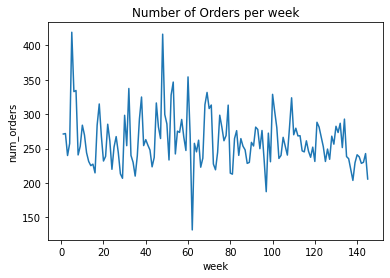

In [28]:
fig,ax = plt.subplots(1,1,figsize=(6,4));
sns.lineplot(data = week_train, x=week_train.index, y= 'num_orders');
ax.set_title("Number of Orders per week");

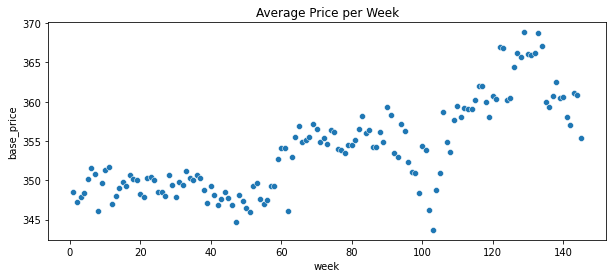

In [29]:
fig,ax = plt.subplots(1,1,figsize=(10,4));
sns.scatterplot(data = week_train, x= week_train.index, y= "base_price");
ax.set_title("Average Price per Week");

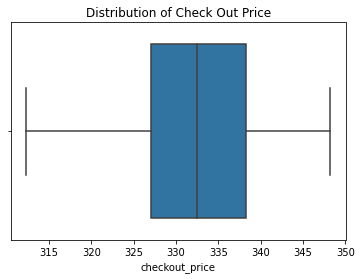

In [30]:
fig,ax = plt.subplots(1,1,figsize=(6,4));
sns.boxplot(data = week_train, x= "checkout_price");
ax.set_title("Distribution of Check Out Price");

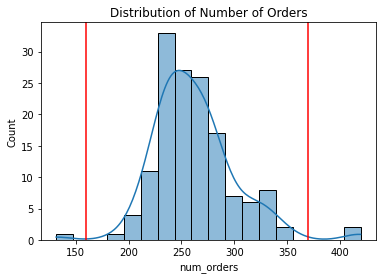

In [31]:
fig,ax = plt.subplots(1,1,figsize=(6,4));
sns.histplot(data = week_train, x= "num_orders", kde = True);
ax.set_title("Distribution of Number of Orders");
ax.axvline(160, color = 'red')
ax.axvline(370, color = 'red')

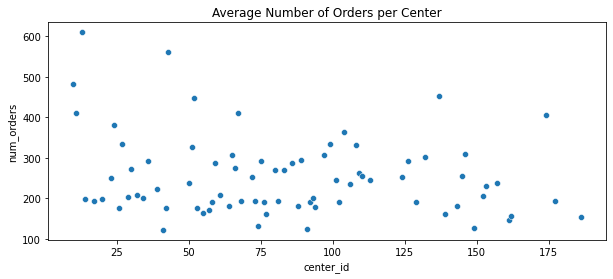

In [32]:
fig,ax = plt.subplots(1,1,figsize=(10,4));
sns.scatterplot(data = center_id_train, x= center_id_train.index, y= 'num_orders', ax=ax);
ax.set_title("Average Number of Orders per Center");

features_1:'city_code','center_type','op_area'

In [18]:
features_1 = ['city_code','center_type','op_area']
print(f'missing values in city code: ', any(train_data['city_code'].isnull()))
print(f'missing values in center type: ', any(train_data['center_type'].isnull()))
print(f'missing values in op area: ', any(train_data['op_area'].isnull()))

missing values in city code:  False
missing values in center type:  False
missing values in op area:  False


no missing values

In [19]:
print(train_data['city_code'].unique())
print(train_data['center_type'].unique())

[647 614 679 659 526 590 599 685 461 649 541 478 703 576 628 702 579 596
 648 632 522 615 577 517 651 683 713 609 675 553 593 654 693 658 515 556
 561 680 620 638 700 676 604 456 562 695 699 602 485 698 473]
['TYPE_C' 'TYPE_B' 'TYPE_A']


There are 51 citys. and 3 center types

<AxesSubplot:xlabel='city_code', ylabel='count'>

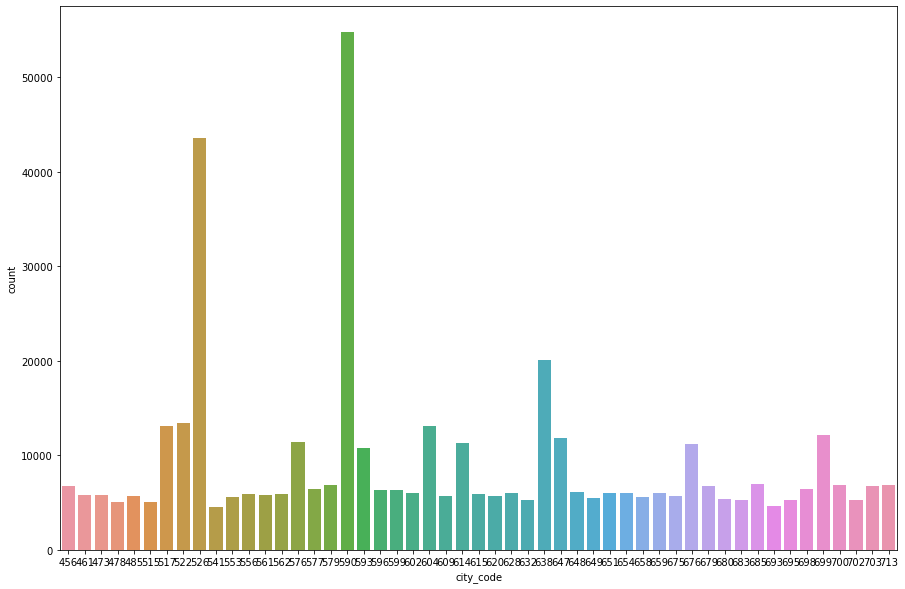

In [20]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(x=train_data.city_code)

Most of the citys have around 5000-7000 data points, expect for a few, such as 252 959

<AxesSubplot:xlabel='center_type', ylabel='count'>

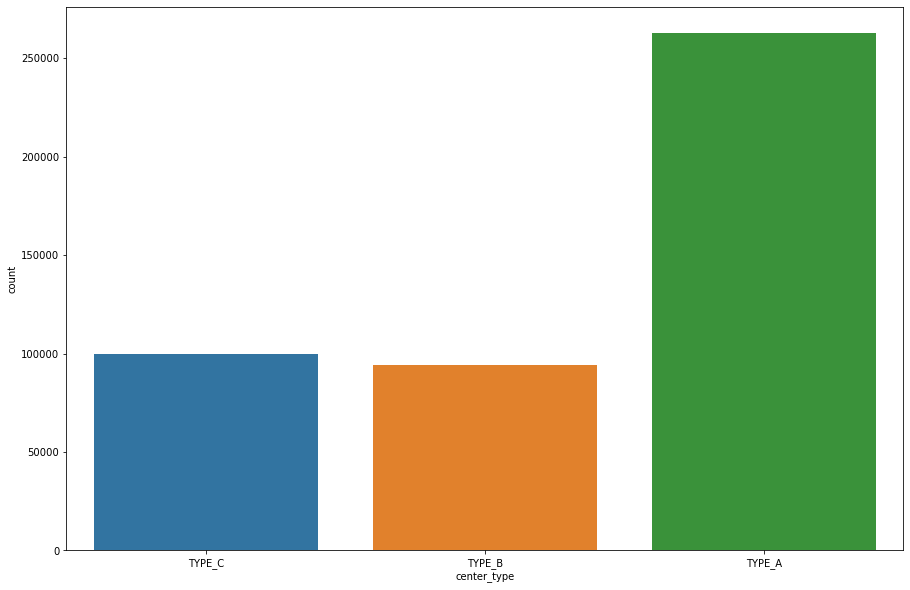

In [21]:
fig, ax = plt.subplots(figsize=(15,10))
sns.countplot(x=train_data.center_type)

The distribution of center_type is unbalanced with more TYPE_A

(array([  3432.,  13595.,  17451.,  47732., 136159., 140250.,  50136.,
         13046.,   7015.,  27732.]),
 array([0.9 , 1.51, 2.12, 2.73, 3.34, 3.95, 4.56, 5.17, 5.78, 6.39, 7.  ]),
 <BarContainer object of 10 artists>)

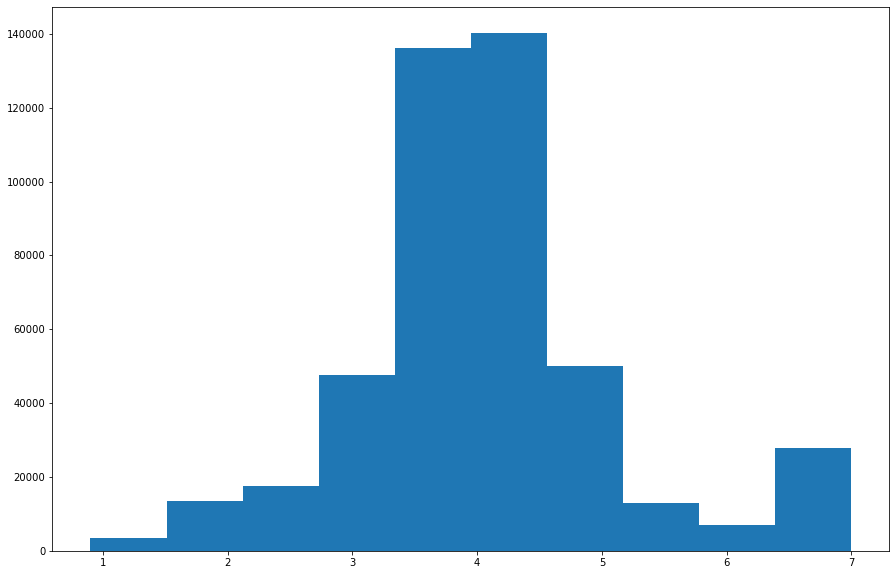

In [22]:
fig, ax = plt.subplots(figsize=(15,10))
plt.hist(x=train_data.op_area)

op_area is roughly normally distributied.

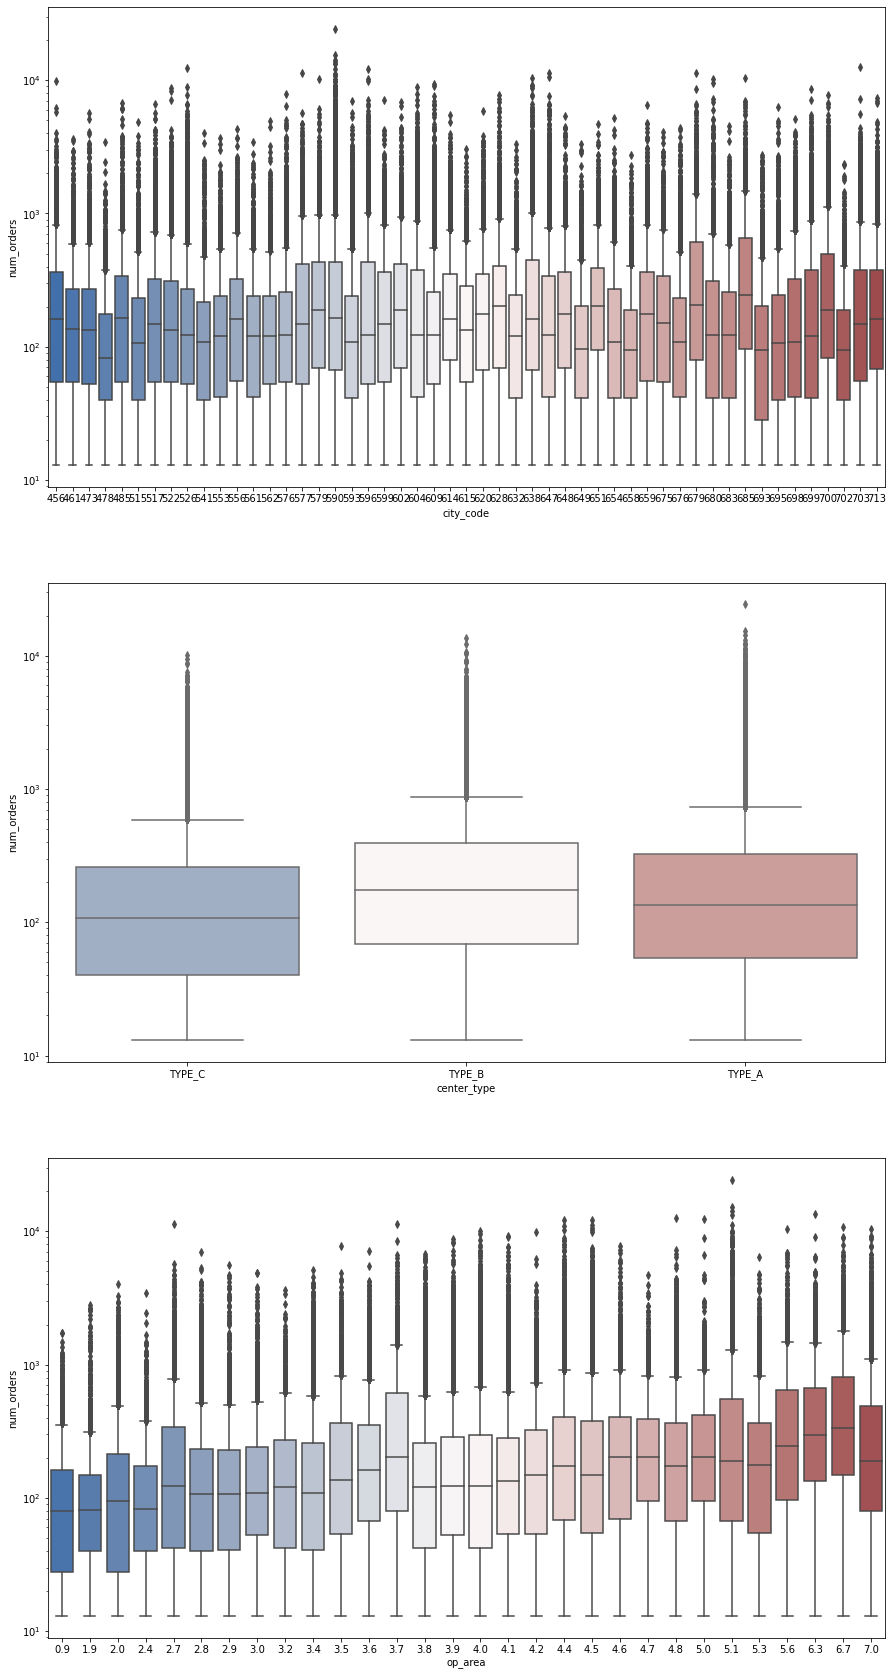

In [23]:
fig, ax = plt.subplots(3,1,figsize=(15,30))

for var, subplot in zip(['city_code','center_type','op_area'],ax.flatten()):
    subplot.set_yscale("log")
    sns.boxplot(x=var, y=target, data=train_data, palette="vlag", ax=subplot)

for city_code, center_type and op_area vs target (num_orders) distribution, the medians are around 100, but as we can see in the boxplot, there are many outliers for every category.